In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv('IIOT-temp-warn.csv')
df=pd.DataFrame(data,columns=['room_id/id', 'noted_date', 'temp', 'out/in', 'Month', 'name_months','temp_warn'])



In [2]:
df

,room_id/id,noted_date,temp,out/in,Month,name_months,temp_warn
0,Room Admin,01-11-2018 00:06,32,In,11,November,0
1,Room Admin,01-11-2018 00:07,40,Out,11,November,0
2,Room Admin,01-11-2018 00:09,39,Out,11,November,0
3,Room Admin,01-11-2018 00:13,40,Out,11,November,0
4,Room Admin,01-11-2018 00:23,40,Out,11,November,0
...,...,...,...,...,...,...,...
102922,Room Admin,31-10-2018 23:52,40,Out,10,October,0
102923,Room Admin,31-10-2018 23:53,39,Out,10,October,0
102924,Room Admin,31-10-2018 23:54,32,In,10,October,0
102925,Room Admin,31-10-2018 23:55,40,Out,10,October,0


In [3]:
df.describe()

,temp,Month,temp_warn
count,102927.000000,102927.000000,102927.000000
mean,35.195517,9.774102,0.056856
std,5.834606,0.954214,0.231568
min,21.000000,7.000000,0.000000
25%,30.000000,9.000000,0.000000
50%,35.000000,10.000000,0.000000
75%,40.000000,10.000000,0.000000
max,51.000000,12.000000,1.000000


In [4]:
# Codificar la columna 'out/in' a valores numéricos
le = LabelEncoder()
df['out/in_encoded'] = le.fit_transform(df['out/in'])

# Características: Temperatura, Ubicación (dentro o fuera), Mes
X = df[['temp', 'out/in_encoded', 'Month']]
y = df['temp_warn']  # Etiquetas: Warnings correspondientes (0 o 1)

# División de datos de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}



Training and evaluating Logistic Regression...
Accuracy for Logistic Regression: 0.9454370573318954
Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     97075
           1       0.60      0.12      0.20      5852

    accuracy                           0.95    102927
   macro avg       0.78      0.56      0.58    102927
weighted avg       0.93      0.95      0.93    102927

Confusion matrix for Logistic Regression:
[[96620   455]
 [ 5161   691]]


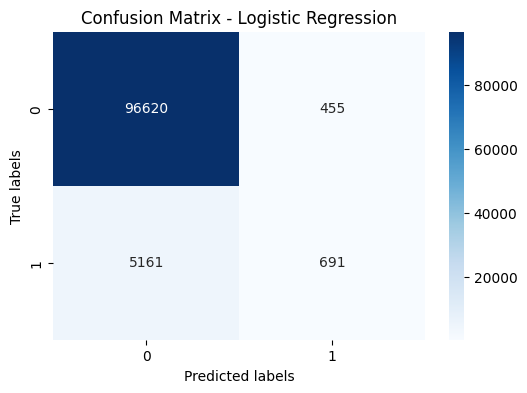


Training and evaluating Decision Tree...
Accuracy for Decision Tree: 0.9535301718693832
Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     97075
           1       0.64      0.41      0.50      5852

    accuracy                           0.95    102927
   macro avg       0.80      0.70      0.74    102927
weighted avg       0.95      0.95      0.95    102927

Confusion matrix for Decision Tree:
[[95757  1318]
 [ 3465  2387]]


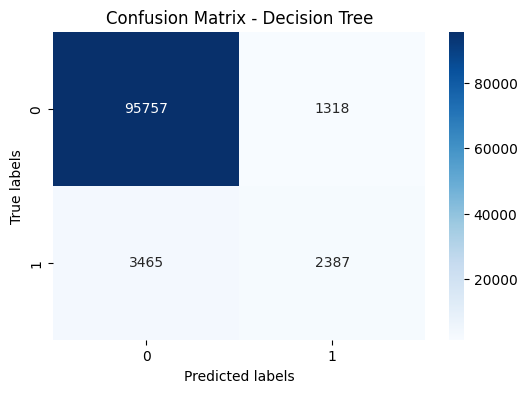


Training and evaluating Random Forest...
Accuracy for Random Forest: 0.9534330156324385
Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     97075
           1       0.64      0.41      0.50      5852

    accuracy                           0.95    102927
   macro avg       0.80      0.70      0.74    102927
weighted avg       0.95      0.95      0.95    102927

Confusion matrix for Random Forest:
[[95720  1355]
 [ 3438  2414]]


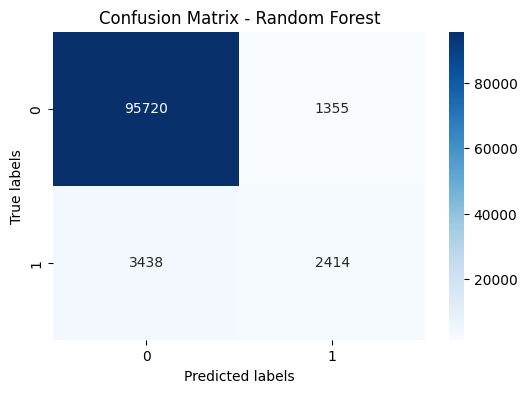


Training and evaluating SVM...
Accuracy for SVM: 0.9431441701400022
Classification report for SVM:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     97075
           1       0.00      0.00      0.00      5852

    accuracy                           0.94    102927
   macro avg       0.47      0.50      0.49    102927
weighted avg       0.89      0.94      0.92    102927

Confusion matrix for SVM:
[[97075     0]
 [ 5852     0]]


/home/arppath/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/arppath/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/arppath/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


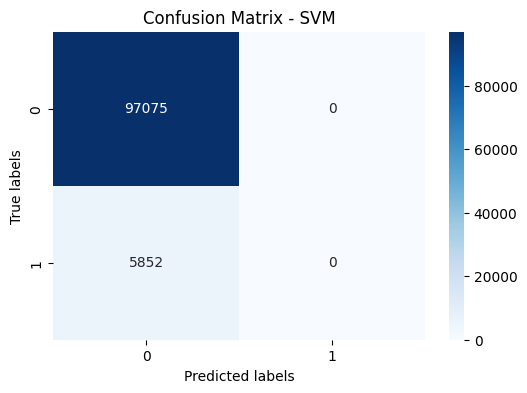


Training and evaluating KNN...
Accuracy for KNN: 0.9379754583345478
Classification report for KNN:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     97075
           1       0.36      0.12      0.18      5852

    accuracy                           0.94    102927
   macro avg       0.65      0.55      0.57    102927
weighted avg       0.92      0.94      0.92    102927

Confusion matrix for KNN:
[[95852  1223]
 [ 5161   691]]


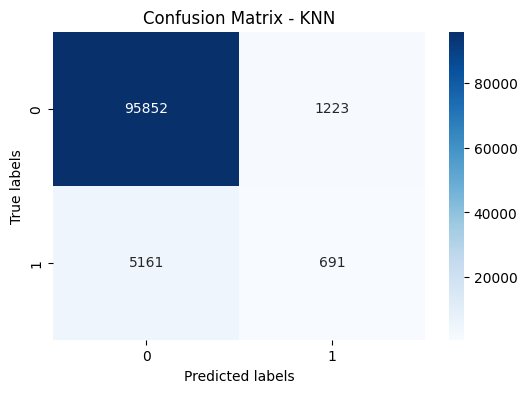

In [5]:
# Entrenamiento y evaluación de modelos con K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Training and evaluating {name}...")
    y_pred = cross_val_predict(model, X, y, cv=kf)
    accuracy = accuracy_score(y, y_pred)
    report = classification_report(y, y_pred)
    confusion = confusion_matrix(y, y_pred)
    print(f"Accuracy for {name}: {accuracy}")
    print(f"Classification report for {name}:\n{report}")
    print(f"Confusion matrix for {name}:\n{confusion}")

    # Visualización de la matriz de confusión con seaborn
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    print("") 